# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../python-ml-course-master/datasets/ads/Advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
lm = smf.ols(formula="Sales~TV", data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería Sales = 7.032594 + 0.047537 * TV

In [5]:
# p-valores podemos garantizar que no son 0 (deben ser bajos)
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [6]:
# R^2
lm.rsquared

0.611875050850071

In [7]:
# R^2 ajustado tiende a ser mejor
lm.rsquared_adj

0.6099148238341623

In [8]:
# Todos los datos
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        21:24:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Prediccion de ventas para TV
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Text(0.5, 1.0, 'Prediccion de ventas vs Datos')

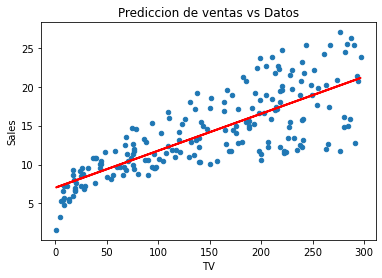

In [10]:
%matplotlib inline
data.plot(kind="scatter", x="TV", y="Sales")  # Datos originales
plt.plot(data["TV"], sales_pred, c="red", linewidth=2)  # Modelo
plt.title("Prediccion de ventas vs Datos")

In [11]:
# Recta de regresión
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]
rse_sq = data["Sales"] - data["sales_pred"]
data["RSE"] = rse_sq**2

In [12]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [13]:
# Desviación típica de los residuos
RSE = np.sqrt(SSD/(len(data) - 2))
RSE

3.258656369238098

In [14]:
# Promedio total de ventas
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [15]:
# Error promedio 23%
error = RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

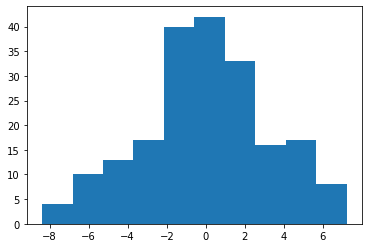

In [16]:
# Histograma de errores
plt.hist(rse_sq)

# Regresión lineal multiple en Python
## El paquete statsmodel para regresion múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

Si algunas de las variables tiene un p-valor grande (>0,05), se puede eliminar del modelo ya que indica que no es un buen predictor del resultado del mismo.

Añadir las variables que aumenten el valor de $ R^2 $ ajustado.

In [17]:
# Añadir Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [18]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [19]:
lm2.pvalues
# El modelo sugiere que los modelos no son nulos, por tanto el modelo parece consistente

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [20]:
lm2.rsquared_adj
# Muestra una pequeña mejora

0.6422399150864777

In [21]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [22]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.5618118968273

In [23]:
RSE = np.sqrt(SSD/(len(data) - 3))  # n - 2 variables - 1
RSE

3.120719860252885

In [24]:
error = RSE/sales_m
error

0.22255089037282116

In [25]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.95e-45
Time:                        21:24:19   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION:** Añadir el Newspaper al modelo original, no ha aportado nada.

In [26]:
# Añadir Radio al modelo original
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()

In [27]:
lm3.summary()
# El p-valor es demasiado pequeño y el estadistico y el coeficiente de Radio son grande, lo que significa que a mejorado.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        21:24:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data) - 3)) # -3 = - 2 variables - 1
RSE

1.681360912508001

In [29]:
error = RSE/sales_m
error
# Error del 12%

0.11990450436855059

**CONCLUSION:** Los gastos en Radio y TV describen de forma más precisa las ventas.

In [30]:
# Añadir TV, Radio y Newspaper al modelo original
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [31]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        21:24:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sales_pred = lm3.predict(data[["TV", "Radio", "Newspaper"]])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data) - 4)) # -4 = - 3 variables - 1
RSE

1.6856446415208184

In [33]:
RSE/sales_m
# Error del 12%

0.12020999404676898

**CONCLUSION:** Añadir Newspaper al modelo de TV y Radio no aporta al modelo.

# Multicolinealidad
## Factor Inflación de la Varianza
El factor de inflación de la varianza cuantifica la intensidad de la multicolinealidad en un análisis de regresión normal de mínimos cuadrados. Proporciona un índice que mide hasta qué punto la varianza de un coeficiente de regresión estimado se incrementa a causa de la colinealidad

$ VIF_j = \frac{1}{1-R_j ^2} $

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

Identificar los pares de variables predictores con alta correlacion utilizando la matriz de correlación, y comprobar los pares con multicolinealidad. Una de ellas debe eliminarse del modelo utilizando el metodo VIF.

In [34]:
# Newspaper~TV+Radio -> R² VIF = 1/(1 - R²)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1 - rsquared_n)
VIF

1.1451873787239286

In [35]:
# TV~Newspaper+Radio -> R² VIF = 1/(1 - R²)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1 - rsquared_tv)
VIF

# 1.00 significa que TV no esta correlacionada.

1.00461078493965

In [36]:
# Radio~TV+Newspaper -> R² VIF = 1/(1 - R²)
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1 - rsquared_r)
VIF

# Newspaper y Radio estan correlacionadas

1.1449519171055353

In [37]:
# Decidimos quedarnos con el modelo lm3 de radio
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        21:24:22   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*CONCLUSION:* **EL modelo de TV-Radio es mejor**